In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib


In [2]:
data_pricing = pd.read_csv('get_around_pricing_project.csv')

In [3]:
df_pricing=data_pricing.copy()
df_pricing.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [4]:
#Drop Unnamed:0 column
df_pricing.drop('Unnamed: 0', axis=1, inplace=True)
df_pricing.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [5]:
# Types and missing values
df_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   model_key                  4843 non-null   object
 1   mileage                    4843 non-null   int64 
 2   engine_power               4843 non-null   int64 
 3   fuel                       4843 non-null   object
 4   paint_color                4843 non-null   object
 5   car_type                   4843 non-null   object
 6   private_parking_available  4843 non-null   bool  
 7   has_gps                    4843 non-null   bool  
 8   has_air_conditioning       4843 non-null   bool  
 9   automatic_car              4843 non-null   bool  
 10  has_getaround_connect      4843 non-null   bool  
 11  has_speed_regulator        4843 non-null   bool  
 12  winter_tires               4843 non-null   bool  
 13  rental_price_per_day       4843 non-null   int64 
dtypes: bool(

No missing values

In [6]:
# some statistics
df_pricing.describe()

,mileage,engine_power,rental_price_per_day
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,121.214536
std,6.019674e+04,38.99336,33.568268
min,-6.400000e+01,0.00000,10.000000
25%,1.029135e+05,100.00000,104.000000
50%,1.410800e+05,120.00000,119.000000
75%,1.751955e+05,135.00000,136.000000
max,1.000376e+06,423.00000,422.000000


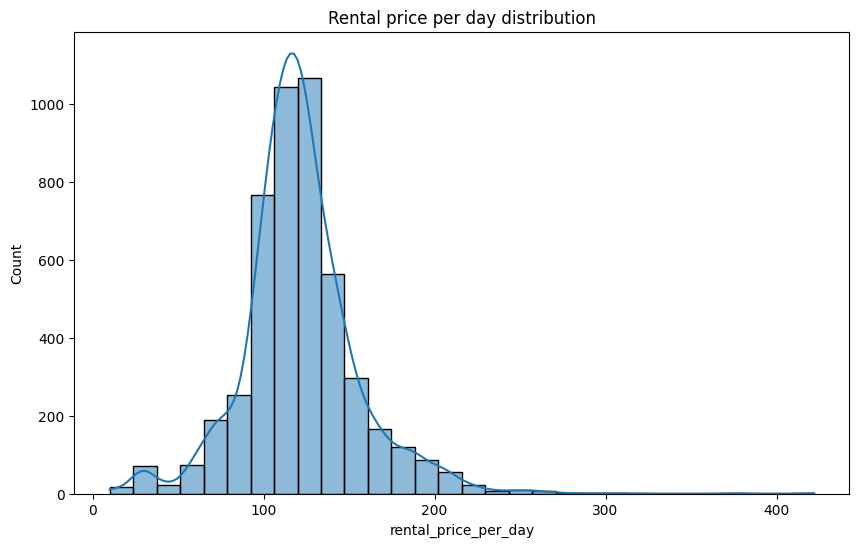

In [7]:
# Rental_price_per_day distribution
plt.figure(figsize=(10,6))
sns.histplot(df_pricing['rental_price_per_day'], bins=30, kde=True)
plt.title('Rental price per day distribution')
plt.show()

Le rental_price_per_day eleve represente la gamme de voitures de luxe 

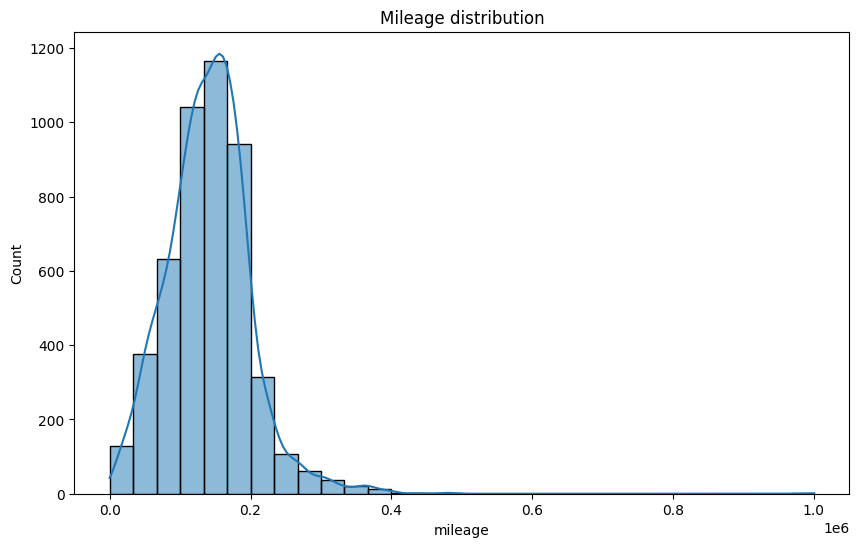

In [8]:
# Mileage distribution
plt.figure(figsize=(10,6))
sns.histplot(df_pricing['mileage'], bins=30, kde=True)
plt.title('Mileage distribution')
plt.show()

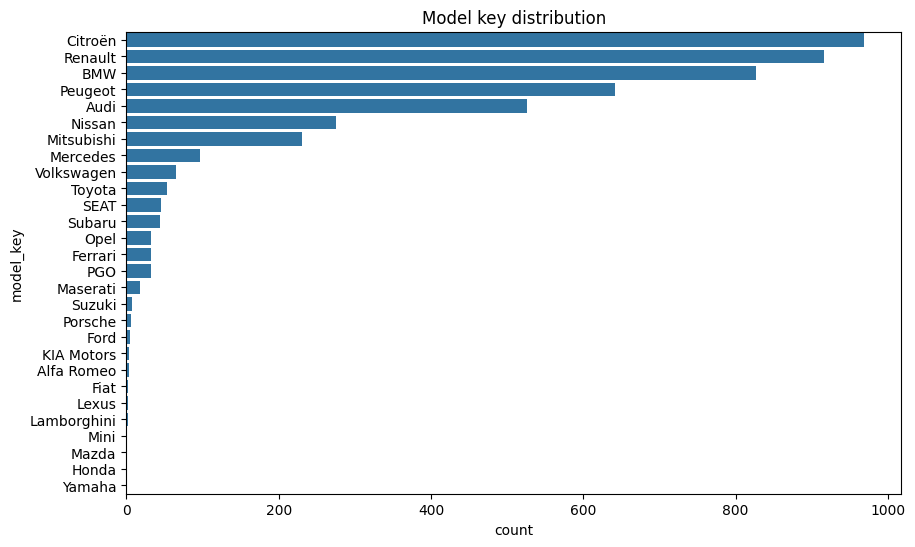

In [9]:
#Model_key distribution
df_model=df_pricing['model_key']
plt.figure(figsize=(10,6))
sns.countplot(df_model, order = df_model.value_counts().index)
plt.title('Model key distribution')
plt.show()

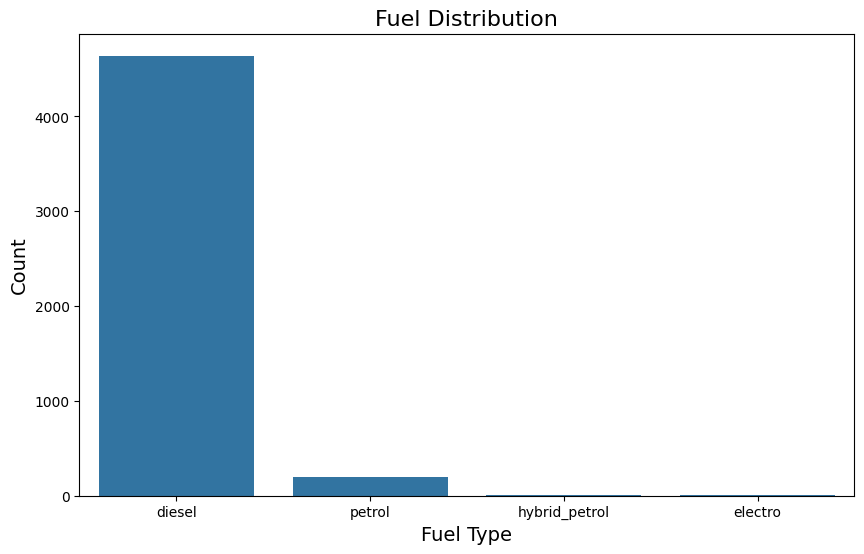

In [10]:
df_fuel = df_pricing['fuel']
plt.figure(figsize=(10, 6))
sns.countplot(x=df_fuel, order=df_fuel.value_counts().index)
plt.title('Fuel Distribution', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Baseline Model

In [11]:
df_pricing.columns

Index(['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color',
       'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

In [12]:
# Je sépare la variable à expliquer de la variable expliquative ici
features_list=['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color','car_type', 'has_gps','has_air_conditioning', 'automatic_car']
target='rental_price_per_day'
X = df_pricing[features_list]
Y = df_pricing[target]
print("...Done.")
print()
print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

...Done.

Y : 
0    106
1    264
2    101
3    158
4    183
Name: rental_price_per_day, dtype: int64

X :
  model_key  mileage  engine_power    fuel paint_color     car_type  has_gps  \
0   Citroën   140411           100  diesel       black  convertible     True   
1   Citroën    13929           317  petrol        grey  convertible     True   
2   Citroën   183297           120  diesel       white  convertible    False   
3   Citroën   128035           135  diesel         red  convertible     True   
4   Citroën    97097           160  diesel      silver  convertible     True   

   has_air_conditioning  automatic_car  
0                 False          False  
1                 False          False  
2                 False          False  
3                 False          False  
4                 False          False  


In [13]:
# Je divise le jeu de données en jeu d'entrainement 80% et teste 20%
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



Preprocessing

In [14]:
numeric_features = ['mileage','engine_power']
numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
        ])
categorical_features = ['model_key', 'fuel', 'paint_color','car_type', 'has_gps','has_air_conditioning', 'automatic_car']
categorical_transformer = Pipeline(
    steps=[
        ('encoder', OneHotEncoder(drop='first',handle_unknown='ignore'))
        ])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ])

In [15]:
X_train = preprocessor.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) 
print()

...Done!
  (0, 0)	-0.36161786696258125
  (0, 1)	0.15047345158890083
  (0, 22)	1.0
  (0, 36)	1.0
  (0, 42)	1.0
  (0, 48)	1.0
  (1, 0)	1.5215638029960556
  (1, 1)	0.15047345158890083
  (1, 4)	1.0
  (1, 32)	1.0
  (1, 42)	1.0
  (1, 48)	1.0
  (2, 0)	-1.0528939316015553
  (2, 1)	-0.6111337491628637
  (2, 3)	1.0
  (2, 32)	1.0
  (2, 46)	1.0
  (2, 48)	1.0
  (3, 0)	0.6514141742510409
  (3, 1)	-0.6111337491628637
  (3, 20)	1.0
  (3, 34)	1.0
  (3, 42)	1.0
  (3, 48)	1.0
  (4, 0)	0.041319062576500504
  (4, 1)	0.2012472649723518
  (4, 4)	1.0
  (4, 31)	1.0
  (4, 32)	1.0
  (4, 44)	1.0
  (4, 48)	1.0



In [16]:
print("Preprocessing X_test...")
print(X_test.head())
print()
X_test = preprocessor.transform(X_test)
print("...Done!")
print(X_test[0:5,:])
print()

Preprocessing X_test...
     model_key  mileage  engine_power    fuel paint_color   car_type  has_gps  \
3203   Renault   109839           135  diesel       black      sedan     True   
1957  Mercedes   180032           105  diesel        grey  hatchback     True   
1044      Audi   147699           190  diesel        grey     estate     True   
2732   Renault    95241            85  diesel        blue      sedan     True   
1538       PGO   133214           190  diesel       black     estate     True   

      has_air_conditioning  automatic_car  
3203                 False          False  
1957                 False          False  
1044                 False           True  
2732                 False          False  
1538                 False          False  

...Done!
  (0, 0)	-0.5202740780075945
  (0, 1)	0.15047345158890083
  (0, 22)	1.0
  (0, 32)	1.0
  (0, 44)	1.0
  (0, 48)	1.0
  (1, 0)	0.6306721210294677
  (1, 1)	-0.6111337491628637
  (1, 14)	1.0
  (1, 36)	1.0
  (1, 43)	1.0
  

In [17]:
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [18]:
regressor.score(X_train,Y_train)


0.7055937977108434

In [19]:
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[129.74481346  95.60578284 133.29849988 ... 197.48018538 138.24991241
 134.24261694]



In [20]:
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[139.20940413 114.48809972 147.23507067 119.60092722 124.44400042
  81.8194819  100.96320587 127.95159617 143.33553284 110.38509431
 100.98664448 110.65241811 103.07128498 151.98566041 126.64336041
 106.33834268 154.16891415 174.3620661   93.60896938 127.23919222
 193.83419058 112.10640826 100.22244436 132.05694207 101.20971454
  85.94170972 101.23491673 101.70066901 122.64913947 137.95067815
  89.95952385  95.81789418 107.92556273 105.96380035 132.68376112
 122.1499394  119.94567228 118.38111579 115.17068525 198.51491872
 117.6932343  132.89817895 141.36243382 102.10638911 150.98341677
  87.97594552 116.59587839 152.45186434 117.29147203  93.6155779
 120.22232975  98.86825659 103.12289778 185.17969167 103.57462449
  91.57971659 180.00227821 109.90383692 151.06032704 111.41798419
 133.2570746  142.02946489 139.74975386 102.44023612  94.84621349
 118.38470507 132.16369027 104.70661673 106.60512987 100.11605553
 121.76680691  87.85050483 157.60599868 1

In [21]:
# Calculer le R^2
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.7055937977108434
R2 score on test set :  0.6776800609319895


Text(0.5, 0, 'Coefficient Value')

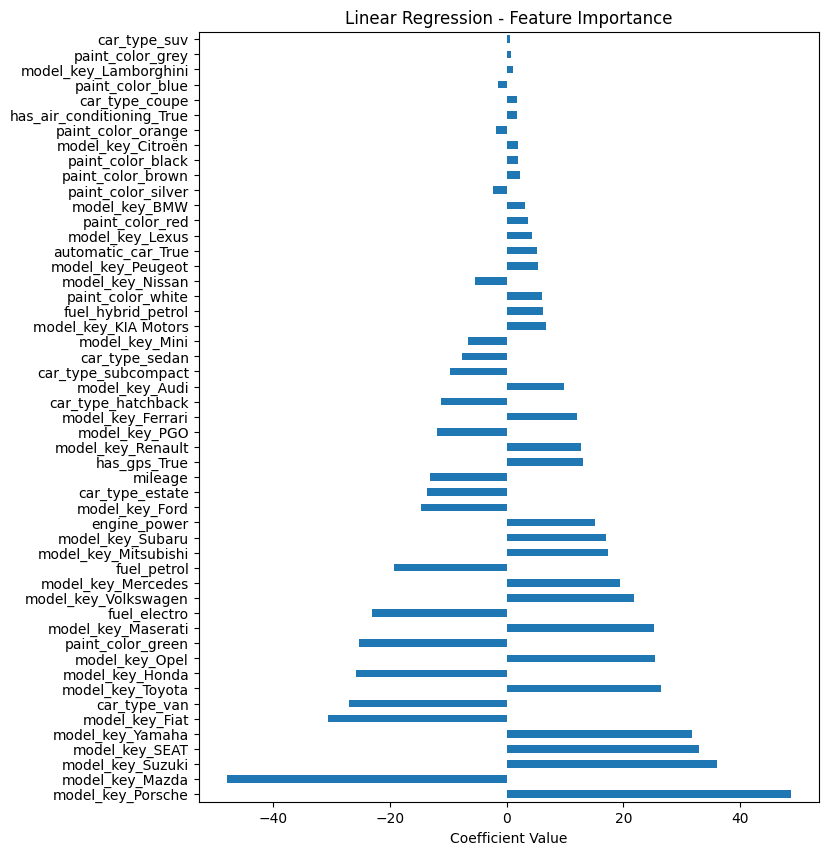

In [22]:
col_names = list(preprocessor.transformers_[0][1].get_feature_names_out()) + list(preprocessor.transformers_[1][1].get_feature_names_out())

coefs = pd.DataFrame(
   regressor.coef_,
   columns=['Coefficients'], index=col_names
)

coefs['Absolute Coefficient'] = coefs['Coefficients'].abs()
coefs_sorted = coefs.sort_values(by='Absolute Coefficient', ascending=False)

coefs_sorted['Coefficients'].plot(kind='barh', figsize=(8, 10))
plt.title('Linear Regression - Feature Importance')
plt.xlabel('Coefficient Value')

# XGBoost Model

In [23]:
df_pricing.columns

Index(['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color',
       'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

In [24]:

features_list=['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color',
       'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires']
target='rental_price_per_day'
X_rf = df_pricing[features_list]
Y_rf = df_pricing[target]
print("...Done.")
print()
print('Y_rf : ')
print(Y_rf.head())
print()
print('X_rf :')
print(X_rf.head())

...Done.

Y_rf : 
0    106
1    264
2    101
3    158
4    183
Name: rental_price_per_day, dtype: int64

X_rf :
  model_key  mileage  engine_power    fuel paint_color     car_type  \
0   Citroën   140411           100  diesel       black  convertible   
1   Citroën    13929           317  petrol        grey  convertible   
2   Citroën   183297           120  diesel       white  convertible   
3   Citroën   128035           135  diesel         red  convertible   
4   Citroën    97097           160  diesel      silver  convertible   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                       True     True                 False          False   
1                       True     True                 False          False   
2                      False    False                 False          False   
3                       True     True                 False          False   
4                       True     True                 False          Fa

In [25]:
# Je divise le jeu de données en jeu d'entrainement 80% et teste 20%
print("Dividing into train and test sets...")
X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(X_rf, Y_rf, test_size=0.2, random_state=42)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [26]:
numeric_features = ['mileage','engine_power']
categorical_features = ['model_key', 'fuel', 'paint_color','car_type', 'has_gps','has_air_conditioning', 'automatic_car','private_parking_available','has_getaround_connect','has_speed_regulator', 'winter_tires']

          

In [27]:
X_train_rf = preprocessor.fit_transform(X_train_rf)
print("...Done!")
print(X_train_rf[0:5,:]) 
print()

...Done!
  (0, 0)	-0.36161786696258125
  (0, 1)	0.15047345158890083
  (0, 22)	1.0
  (0, 36)	1.0
  (0, 42)	1.0
  (0, 48)	1.0
  (1, 0)	1.5215638029960556
  (1, 1)	0.15047345158890083
  (1, 4)	1.0
  (1, 32)	1.0
  (1, 42)	1.0
  (1, 48)	1.0
  (2, 0)	-1.0528939316015553
  (2, 1)	-0.6111337491628637
  (2, 3)	1.0
  (2, 32)	1.0
  (2, 46)	1.0
  (2, 48)	1.0
  (3, 0)	0.6514141742510409
  (3, 1)	-0.6111337491628637
  (3, 20)	1.0
  (3, 34)	1.0
  (3, 42)	1.0
  (3, 48)	1.0
  (4, 0)	0.041319062576500504
  (4, 1)	0.2012472649723518
  (4, 4)	1.0
  (4, 31)	1.0
  (4, 32)	1.0
  (4, 44)	1.0
  (4, 48)	1.0



In [28]:
print("Preprocessing X_test...")
print(X_test_rf.head())
print()
X_test_rf = preprocessor.transform(X_test_rf)
print("...Done!")
print(X_test_rf[0:5,:])
print()

Preprocessing X_test...
     model_key  mileage  engine_power    fuel paint_color   car_type  \
3203   Renault   109839           135  diesel       black      sedan   
1957  Mercedes   180032           105  diesel        grey  hatchback   
1044      Audi   147699           190  diesel        grey     estate   
2732   Renault    95241            85  diesel        blue      sedan   
1538       PGO   133214           190  diesel       black     estate   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
3203                       True     True                 False          False   
1957                       True     True                 False          False   
1044                       True     True                 False           True   
2732                      False     True                 False          False   
1538                       True     True                 False          False   

      has_getaround_connect  has_speed_regulator  winter

In [29]:
#!pip install xgboost -q

In [30]:
#xgboost
from xgboost import XGBRegressor

In [31]:
print("Train model...")
#regressor_rf = RandomForestRegressor(random_state=42)
# regressor_xgb  = XGBRegressor(random_state=42)
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     # 'min_samples_split': [2, 5, 10],
#     # 'min_samples_leaf': [1, 2, 4]
#     'learning_rate': [0.01, 0.1, 0.2]
# }
xg_reg = XGBRegressor()

# Définition des paramètres à optimiser
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [10, 20, 30],
    'reg_lambda': [0, 0.05, 0.5, 1]
}



Train model...


In [32]:
#grid_search = GridSearchCV(estimator=regressor_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train_rf, Y_train_rf)

In [33]:
#print("The best parametrs : ", grid_search.best_params_)

In [34]:
#regressor_rf =RandomForestRegressor(n_estimators=500, max_depth=20, min_samples_leaf=2, min_samples_split=5, random_state=42)
#xgbregressor
regressor_XGB = XGBRegressor(n_estimators=100,learning_rate=0.05,max_depth=10,reg_lambda=1,random_state=42)

In [35]:
regressor_XGB.fit(X_train_rf, Y_train_rf)
print("...Done.")

...Done.


In [36]:
regressor_XGB.score(X_train_rf,Y_train_rf)

0.9501998922916883

In [37]:
print("Predictions on training set...")
Y_train_rf_pred = regressor_XGB.predict(X_train_rf)
print("...Done.")
print(Y_train_rf_pred)
print()

Predictions on training set...
...Done.
[129.20949  108.397026 137.60121  ... 228.04951  147.73793  130.30286 ]



In [38]:
print("Predictions on training set...")
Y_test_rf_pred = regressor_XGB.predict(X_test_rf)
print("...Done.")
print(Y_test_rf_pred)
print()

Predictions on training set...
...Done.
[137.79704  122.34646  149.09872  107.08131  133.79971   88.22674
 101.084145 116.48574  155.20898  118.653046 113.12978  115.77361
 120.47025  160.37254  126.29766  101.15879  177.2402   171.70972
  93.64928  132.41966  239.98225  116.100945  82.953804 130.87227
 108.23872   84.510124 105.250175 104.724976 105.961105 129.90782
 103.82397   76.294266 108.3839   110.5596   151.11792  130.16786
 114.80779  122.47749  115.10821  196.96762  116.10236  132.76436
 133.96088  114.41923  152.41656   94.67765  119.70571  148.61682
 114.10696  102.30255  119.399315  97.839516  82.94026  200.76505
 106.00967   95.021614 194.40457   91.73929  137.57857  119.60567
 136.55069  142.84537  101.91939  105.93242   95.22808  119.53343
 132.53206  100.42049  100.4517   109.027695 125.28824   83.685745
 158.9149   146.60939  137.83972  121.12216  117.26075  114.61231
 108.57385  152.96178  107.392395 141.19295   35.56322  132.73125
 101.16124  116.34478  141.81038   

In [39]:
# Calculer le R^2
print("R2 score on training set : ", r2_score(Y_train_rf, Y_train_rf_pred))
print("R2 score on test set : ", r2_score(Y_test_rf, Y_test_rf_pred))

R2 score on training set :  0.9501998922916883
R2 score on test set :  0.7059831146577399


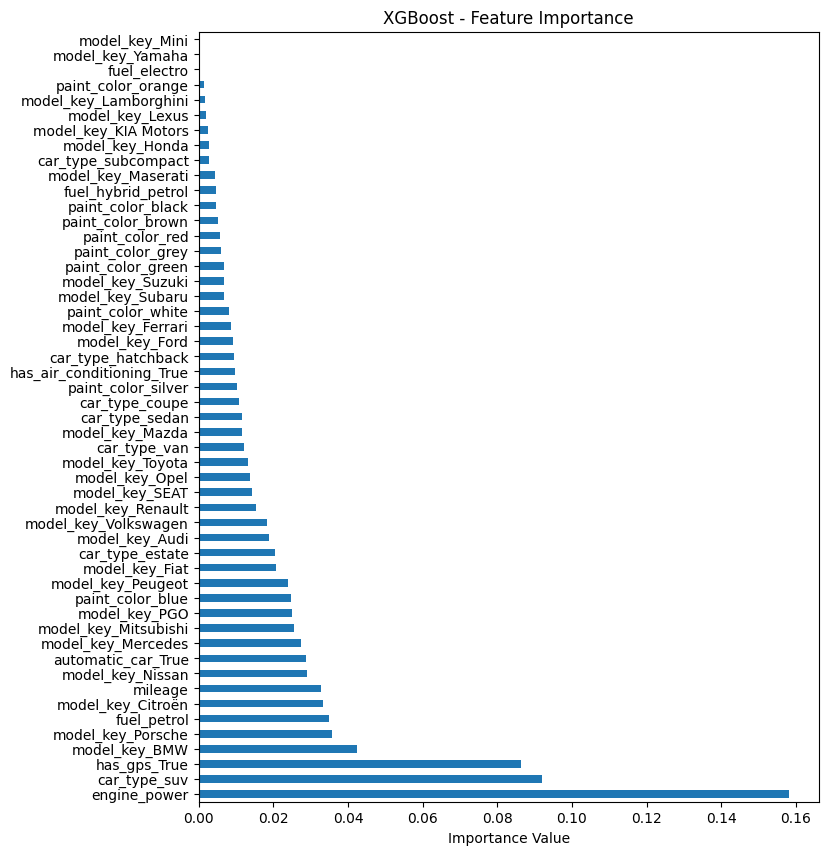

In [40]:
col_names = list(preprocessor.transformers_[0][1].get_feature_names_out()) + list(preprocessor.transformers_[1][1].get_feature_names_out())
importances = regressor_XGB.feature_importances_
coefs = pd.DataFrame(
    importances,
    columns=['Importance'], index=col_names
)
coefs['Absolute Importance'] = coefs['Importance'].abs()
coefs_sorted = coefs.sort_values(by='Absolute Importance', ascending=False)
coefs_sorted['Importance'].plot(kind='barh', figsize=(8, 10))
plt.title('XGBoost - Feature Importance')
plt.xlabel('Importance Value')
plt.show()

In [41]:
# Sauvegarder le modèle et les étapes de preprocessing pour ne pas biaiser le modèle
#joblib.dump(regressor_XGB, 'getaround_api/model_Getaround.pkl')
regressor_XGB.save_model(r'getaround_api/model_Getaround.json')

joblib.dump(preprocessor, 'getaround_api/preprocessor.joblib')


['getaround_api/preprocessor.joblib']

In [44]:
import requests

response = requests.post("http://localhost:8001/predict", json={
  "model_key": "Audi","mileage": 46731,"engine_power": 105,"fuel": "diesel","paint_color": "white","car_type": "estate","private_parking_available": False,
  "has_gps": True,"has_air_conditioning": True,"automatic_car": False,"has_getaround_connect": True,"has_speed_regulator": True,"winter_tires": True
  })
print(response.json())

{'prediction': 143.6233673095703}
